# 2.1 Unsupervised Machine Learning

## Contents:

### 1. Importing Libraries and Data

### 2. Data Wrangling and Scaling

### 3. Dendrograms
- Budapest v Oslo 
    - Single
    - Complete
    - Average
    - Ward
- All Stations
    - Ward
    - Average
    - Complete
    - Single
- Madrid, Heathrow, Maastricht
    - Single
    - Complete
    - Average
    - Ward

### 4. Principal Component Analysis

### 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# Set Path 

path = r'C:\Users\Josh Wattay\anaconda3\ClimateWins Analysis\01 - Data'

In [3]:
pleasant = pd.read_csv(os.path.join(path, 'pleasant_weather.csv'), index_col = False)

In [4]:
pleasant.shape

(22950, 16)

In [5]:
weather = pd.read_csv (os.path.join(path, 'weather_data.csv'), index_col = False)

In [6]:
weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


### 2. Data Wrangling and Scaling
- limiting dataset to 1980

In [7]:
#Subset dataset to 1980
df1980 = weather[weather['DATE'].astype(str).str.contains('1980')] #<-----INSERT YEAR HERE
df1980

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
7305,19800101,1,6,2.1,0.83,1.018,0.40,0.01,8,1.6,...,6,0.90,1.0130,0.17,0.05,0,0.0,4.4,2.1,6.0
7306,19800102,1,5,2.1,0.84,1.018,0.34,0.09,7,0.9,...,7,0.89,1.0195,0.12,1.48,0,0.0,6.4,1.0,11.5
7307,19800103,1,8,2.1,0.80,1.018,0.44,0.07,9,2.0,...,8,0.95,1.0058,0.13,0.60,0,0.0,9.2,6.2,12.2
7308,19800104,1,8,2.1,0.94,1.018,0.18,0.43,9,0.0,...,5,0.80,1.0034,0.30,0.50,0,1.5,7.7,5.8,9.2
7309,19800105,1,8,2.1,0.90,1.018,0.25,0.26,8,0.2,...,7,0.79,1.0134,0.22,0.03,0,0.1,7.6,6.1,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,19801227,12,5,2.1,0.72,1.018,0.56,0.00,0,4.2,...,7,0.94,1.0341,0.16,0.19,0,0.0,6.7,3.3,10.0
7667,19801228,12,7,2.1,0.90,1.018,0.50,0.00,0,3.1,...,8,0.97,1.0358,0.18,0.05,0,0.0,7.2,4.0,10.5
7668,19801229,12,1,2.1,0.81,1.018,0.69,0.00,0,6.8,...,8,0.95,1.0319,0.16,0.12,0,0.0,9.8,8.8,10.7
7669,19801230,12,7,2.1,0.81,1.018,0.46,0.00,0,2.4,...,8,0.91,1.0276,0.17,0.13,0,0.1,10.2,8.9,11.5


In [8]:
# Scaling dfdecade for ML
scaler = StandardScaler()

In [9]:
df1980_scaled = pd.DataFrame(scaler.fit_transform(df1980))

In [10]:
df1980_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,-1.639546,-1.597591,0.146463,-4.440892e-16,0.592181,-2.220446e-16,-0.984680,-0.479666,5.192341,-0.569428,...,-0.070446,0.695009,-0.152794,-1.122781,-0.479657,-0.052342,-0.905042,-1.709969,-1.378123,-2.087878
1,-1.636649,-1.597591,-0.269084,-4.440892e-16,0.698843,-2.220446e-16,-1.054921,-0.270045,4.517005,-0.746670,...,0.543444,0.564494,0.452630,-1.182280,1.097345,-0.052342,-0.905042,-1.135480,-1.652630,-0.460614
2,-1.633753,-1.597591,0.977558,-4.440892e-16,0.272193,-2.220446e-16,-0.937853,-0.322450,5.867678,-0.468147,...,1.157334,1.347583,-0.823416,-1.170381,0.126882,-0.052342,-0.905042,-0.331195,-0.354963,-0.253507
3,-1.630857,-1.597591,0.977558,-4.440892e-16,1.765468,-2.220446e-16,-1.242229,0.620845,5.867678,-0.974552,...,-0.684336,-0.610139,-1.046957,-0.968083,0.016602,-0.052342,-0.441156,-0.762062,-0.454783,-1.141106
4,-1.627961,-1.597591,0.977558,-4.440892e-16,1.338818,-2.220446e-16,-1.160282,0.175400,5.192341,-0.923912,...,0.543444,-0.740653,-0.115537,-1.063282,-0.501713,-0.052342,-0.874116,-0.790786,-0.379918,-1.052346


In [11]:
df1980_scaled.shape

(366, 170)

In [12]:
# Copying columns headers from original weather dataset, pasting to scaled

columns=df1980.columns.values.tolist() #create a list of column names for your df
columns #list the columns

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

In [13]:
df1980_scaled.columns = columns

In [14]:
df1980_scaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.639546,-1.597591,0.146463,-4.440892e-16,0.592181,-2.220446e-16,-0.984680,-0.479666,5.192341,-0.569428,...,-0.070446,0.695009,-0.152794,-1.122781,-0.479657,-0.052342,-0.905042,-1.709969,-1.378123,-2.087878
1,-1.636649,-1.597591,-0.269084,-4.440892e-16,0.698843,-2.220446e-16,-1.054921,-0.270045,4.517005,-0.746670,...,0.543444,0.564494,0.452630,-1.182280,1.097345,-0.052342,-0.905042,-1.135480,-1.652630,-0.460614
2,-1.633753,-1.597591,0.977558,-4.440892e-16,0.272193,-2.220446e-16,-0.937853,-0.322450,5.867678,-0.468147,...,1.157334,1.347583,-0.823416,-1.170381,0.126882,-0.052342,-0.905042,-0.331195,-0.354963,-0.253507
3,-1.630857,-1.597591,0.977558,-4.440892e-16,1.765468,-2.220446e-16,-1.242229,0.620845,5.867678,-0.974552,...,-0.684336,-0.610139,-1.046957,-0.968083,0.016602,-0.052342,-0.441156,-0.762062,-0.454783,-1.141106
4,-1.627961,-1.597591,0.977558,-4.440892e-16,1.338818,-2.220446e-16,-1.160282,0.175400,5.192341,-0.923912,...,0.543444,-0.740653,-0.115537,-1.063282,-0.501713,-0.052342,-0.874116,-0.790786,-0.379918,-1.052346


### 3. Dendrogram code

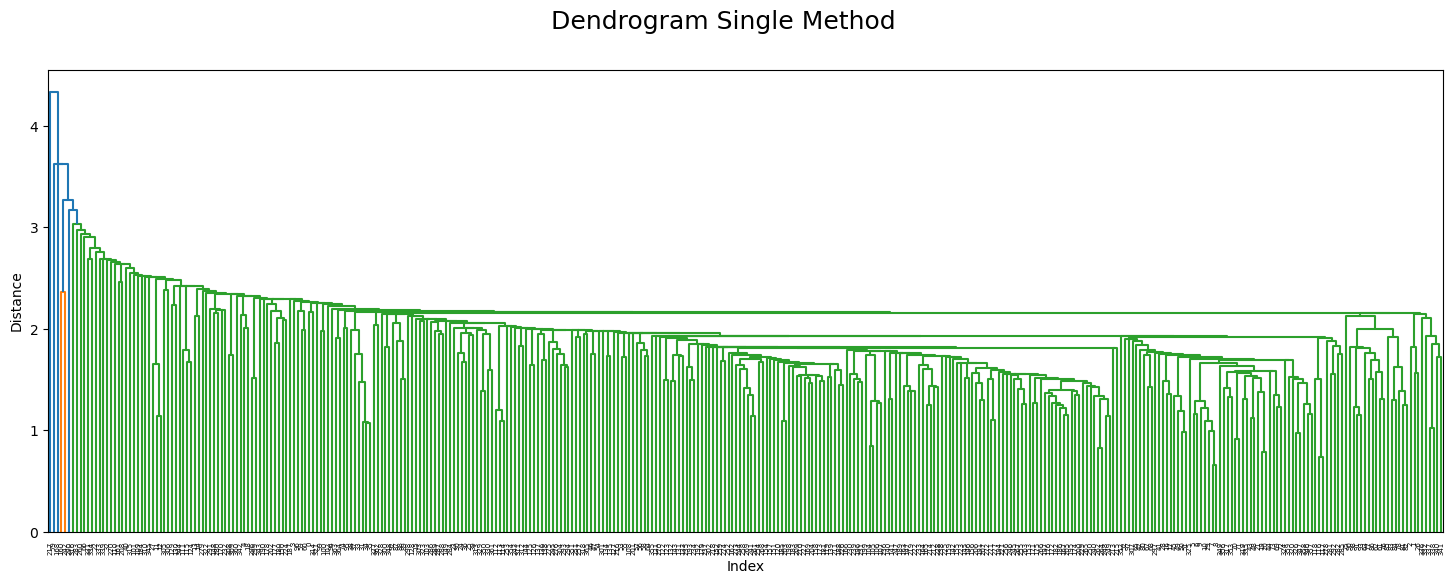

In [16]:
#Comparing Budapest against Oslo 1980 - single method

distance_single = linkage(df1980_scaled.loc[:,
['BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'OSLO_cloud_cover',
 'OSLO_humidity',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',]],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

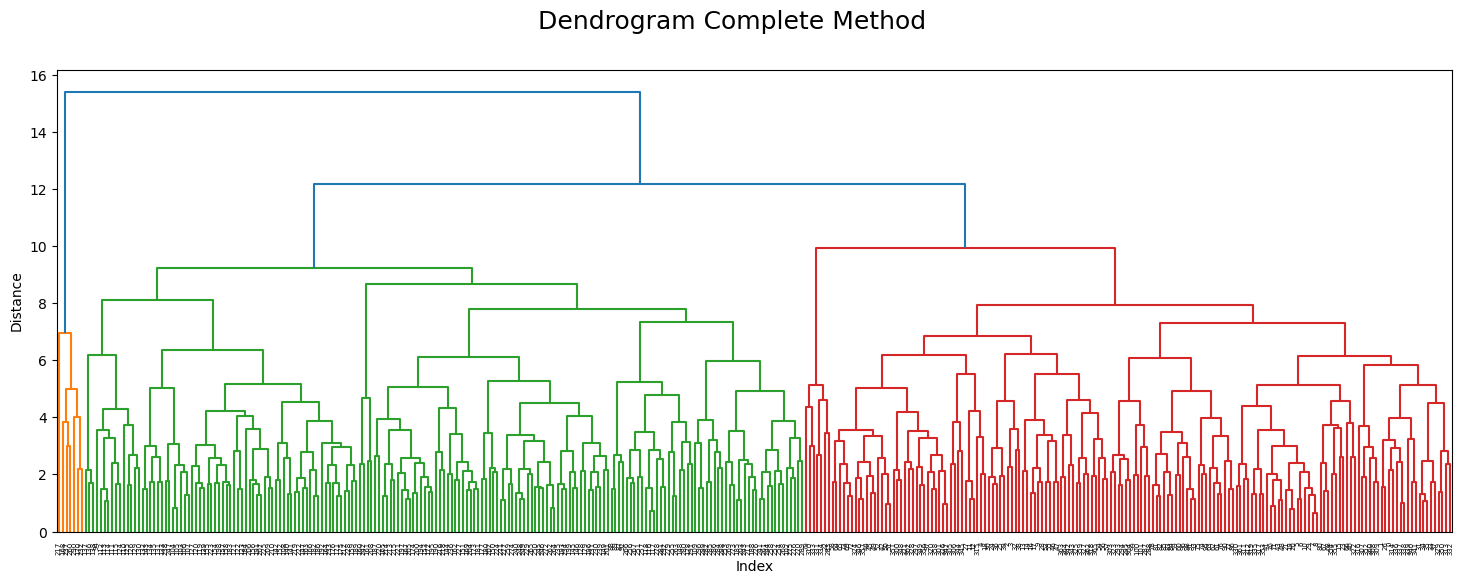

In [17]:
#Comparing only Budapest and Oslo 1980 - complete method

distance_single = linkage(df1980_scaled.loc[:,
['BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'OSLO_cloud_cover',
 'OSLO_humidity',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',]],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

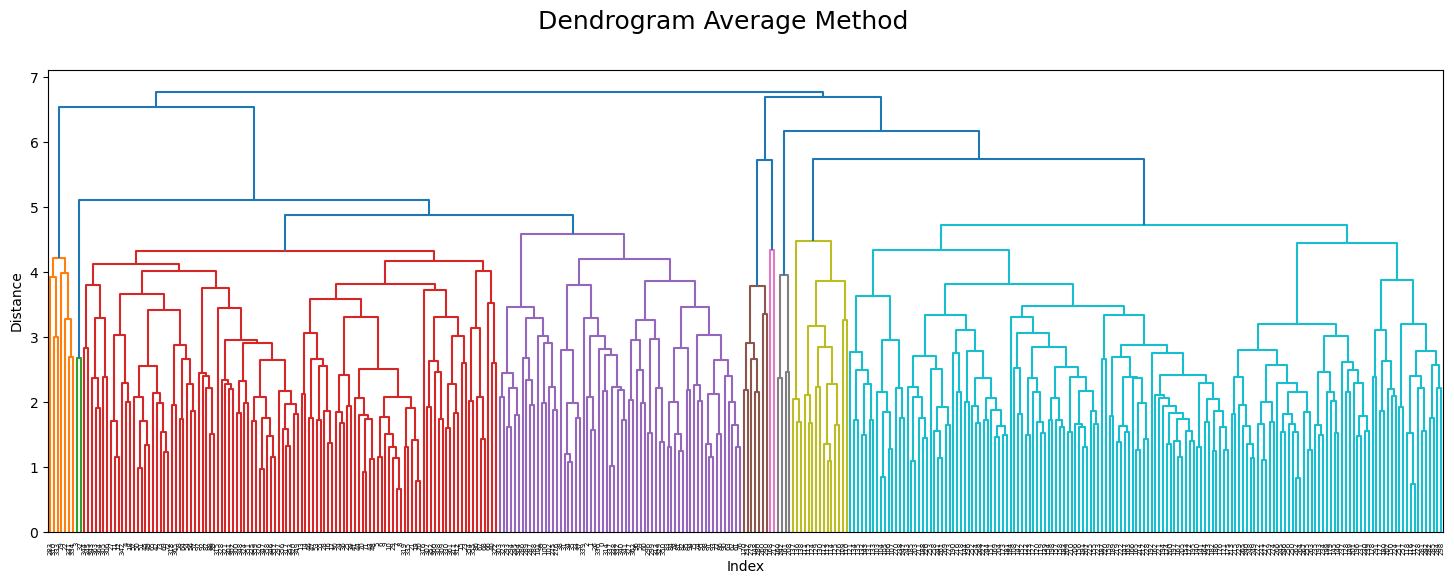

In [19]:
#Comparing only Budapest and Oslo 1980 - average method

distance_single = linkage(df1980_scaled.loc[:,
['BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'OSLO_cloud_cover',
 'OSLO_humidity',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',]],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

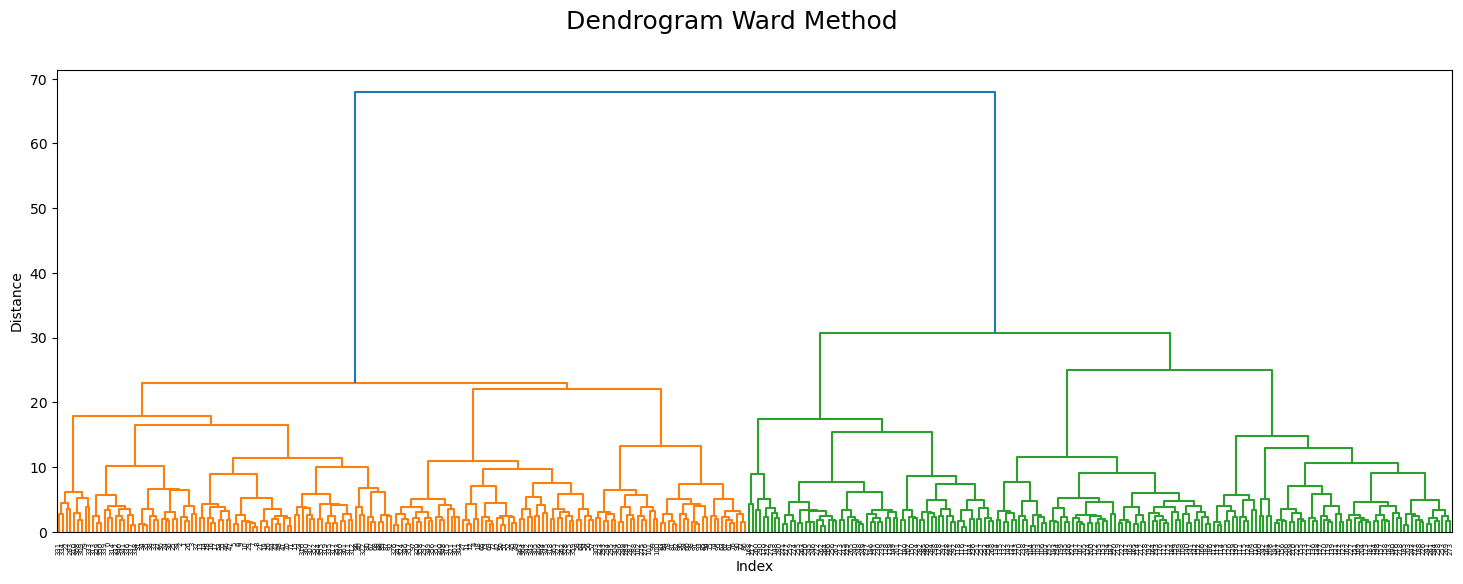

In [20]:
#Comparing only Budapest and Oslo 1980 - ward method

distance_single = linkage(df1980_scaled.loc[:,
['BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'OSLO_cloud_cover',
 'OSLO_humidity',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',]],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

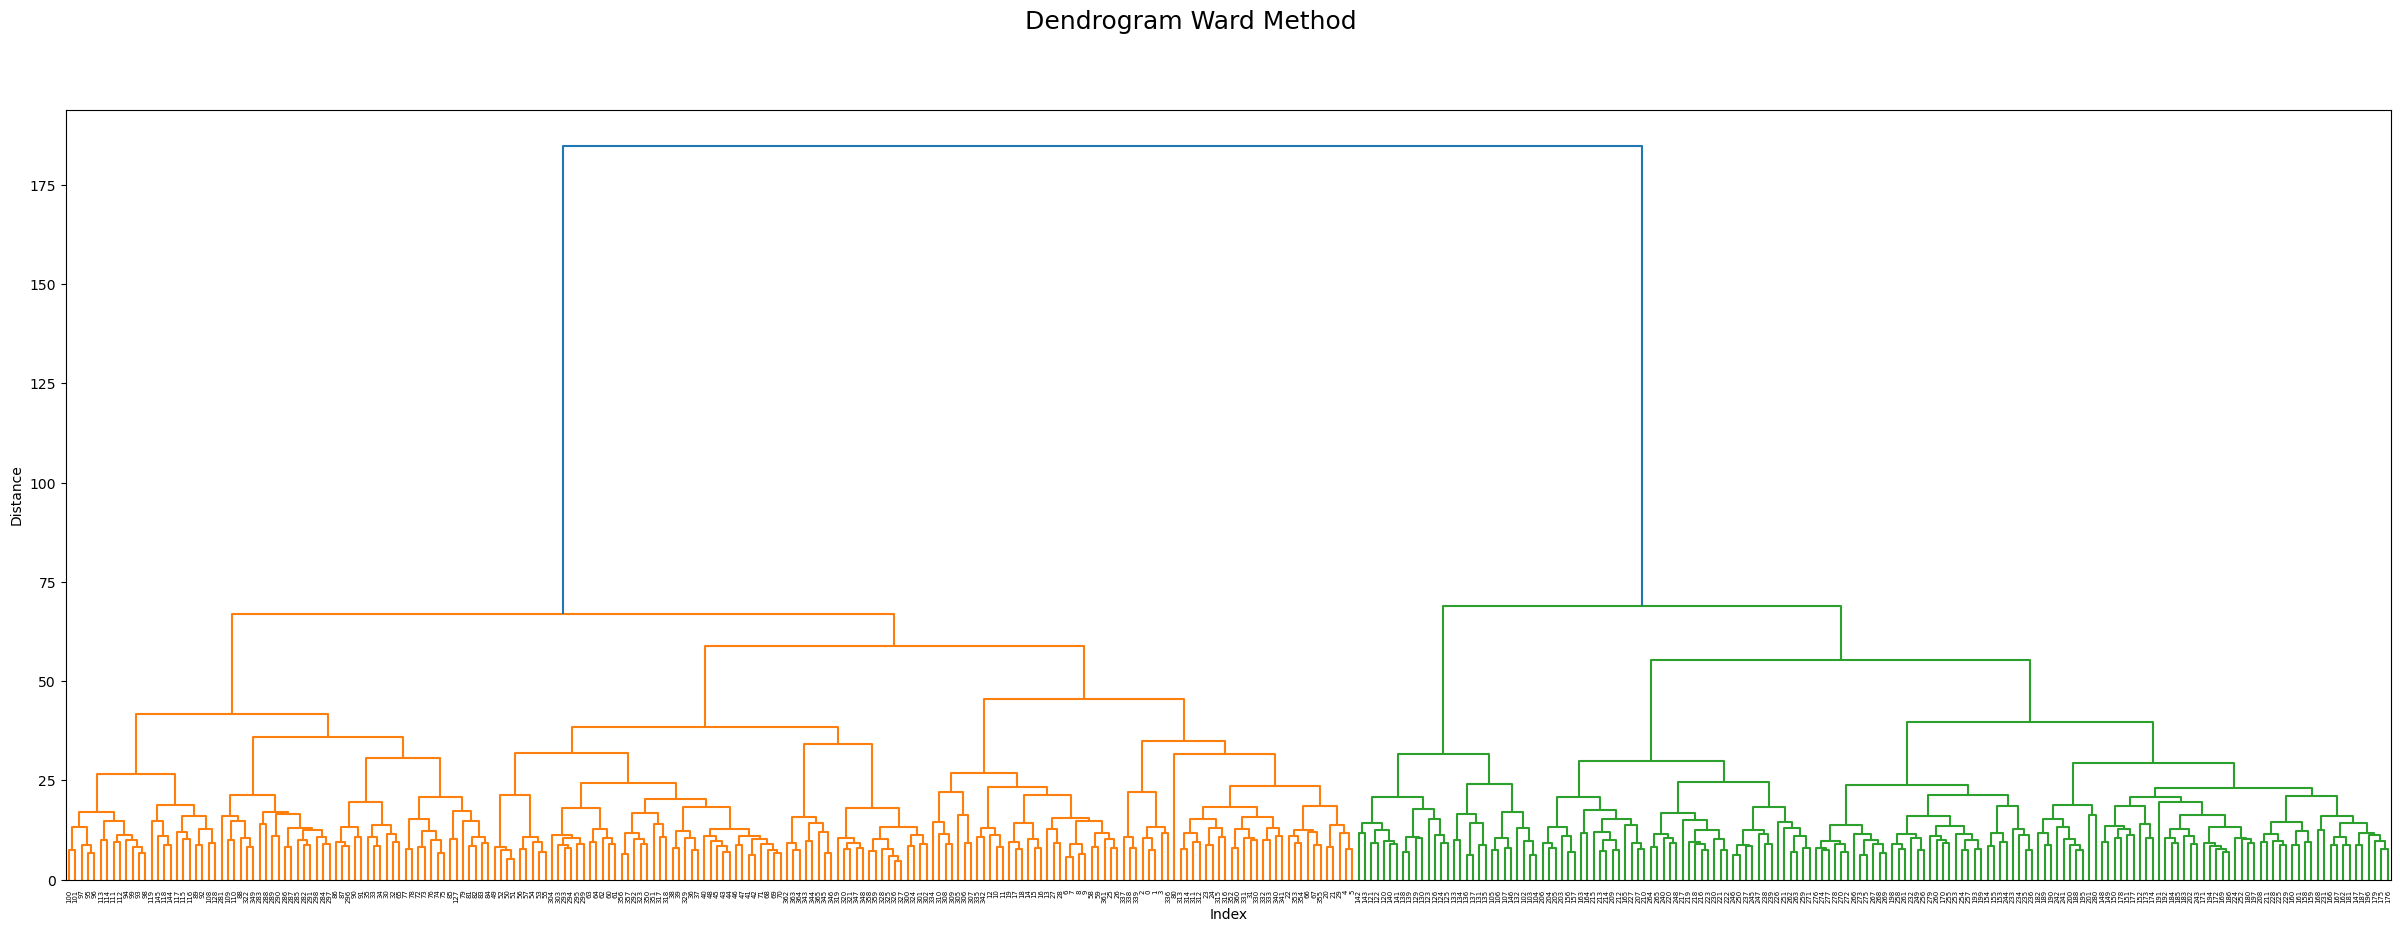

In [21]:
#Comparing all stations 1980 - ward method

distance_single = linkage(df1980_scaled.loc[:,
['BASEL_cloud_cover','BASEL_wind_speed','BASEL_humidity','BASEL_pressure','BASEL_global_radiation','BASEL_precipitation','BASEL_snow_depth',
 'BASEL_sunshine','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max','BELGRADE_cloud_cover','BELGRADE_humidity','BELGRADE_pressure',
 'BELGRADE_global_radiation','BELGRADE_precipitation','BELGRADE_sunshine','BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_cloud_cover','BUDAPEST_humidity','BUDAPEST_pressure','BUDAPEST_global_radiation','BUDAPEST_precipitation',
 'BUDAPEST_sunshine','BUDAPEST_temp_mean','BUDAPEST_temp_min','BUDAPEST_temp_max','DEBILT_cloud_cover','DEBILT_wind_speed','DEBILT_humidity',
 'DEBILT_pressure','DEBILT_global_radiation','DEBILT_precipitation','DEBILT_sunshine','DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_cloud_cover','DUSSELDORF_wind_speed','DUSSELDORF_humidity','DUSSELDORF_pressure','DUSSELDORF_global_radiation','DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth','DUSSELDORF_sunshine','DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max','GDANSK_cloud_cover',
 'GDANSK_humidity','GDANSK_precipitation','GDANSK_snow_depth','GDANSK_temp_mean','GDANSK_temp_min','GDANSK_temp_max','HEATHROW_cloud_cover',
 'HEATHROW_humidity','HEATHROW_pressure','HEATHROW_global_radiation','HEATHROW_precipitation','HEATHROW_snow_depth','HEATHROW_sunshine',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max','KASSEL_wind_speed','KASSEL_humidity','KASSEL_pressure','KASSEL_global_radiation',
 'KASSEL_precipitation','KASSEL_sunshine','KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max','LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed','LJUBLJANA_humidity','LJUBLJANA_pressure','LJUBLJANA_global_radiation','LJUBLJANA_precipitation','LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max','MAASTRICHT_cloud_cover','MAASTRICHT_wind_speed','MAASTRICHT_humidity',
 'MAASTRICHT_pressure','MAASTRICHT_global_radiation','MAASTRICHT_precipitation','MAASTRICHT_sunshine','MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min','MAASTRICHT_temp_max','MADRID_cloud_cover','MADRID_wind_speed','MADRID_humidity','MADRID_pressure','MADRID_global_radiation',
 'MADRID_precipitation','MADRID_sunshine','MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max','MUNCHENB_cloud_cover','MUNCHENB_humidity',
 'MUNCHENB_global_radiation','MUNCHENB_precipitation','MUNCHENB_snow_depth','MUNCHENB_sunshine','MUNCHENB_temp_mean','MUNCHENB_temp_min',
 'MUNCHENB_temp_max','OSLO_cloud_cover','OSLO_wind_speed','OSLO_humidity','OSLO_pressure','OSLO_global_radiation','OSLO_precipitation',
 'OSLO_snow_depth','OSLO_sunshine','OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max','ROMA_cloud_cover','ROMA_wind_speed','ROMA_humidity',
 'ROMA_pressure','ROMA_sunshine','ROMA_temp_mean','SONNBLICK_cloud_cover','SONNBLICK_wind_speed','SONNBLICK_humidity','SONNBLICK_pressure',
 'SONNBLICK_global_radiation','SONNBLICK_precipitation','SONNBLICK_sunshine','SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover','STOCKHOLM_pressure','STOCKHOLM_global_radiation','STOCKHOLM_precipitation','STOCKHOLM_sunshine','STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min','STOCKHOLM_temp_max','TOURS_wind_speed','TOURS_humidity','TOURS_pressure','TOURS_global_radiation','TOURS_precipitation',
 'TOURS_temp_mean','TOURS_temp_min','TOURS_temp_max','VALENTIA_cloud_cover','VALENTIA_humidity','VALENTIA_pressure','VALENTIA_global_radiation',
 'VALENTIA_precipitation','VALENTIA_snow_depth','VALENTIA_sunshine','VALENTIA_temp_mean','VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="ward")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

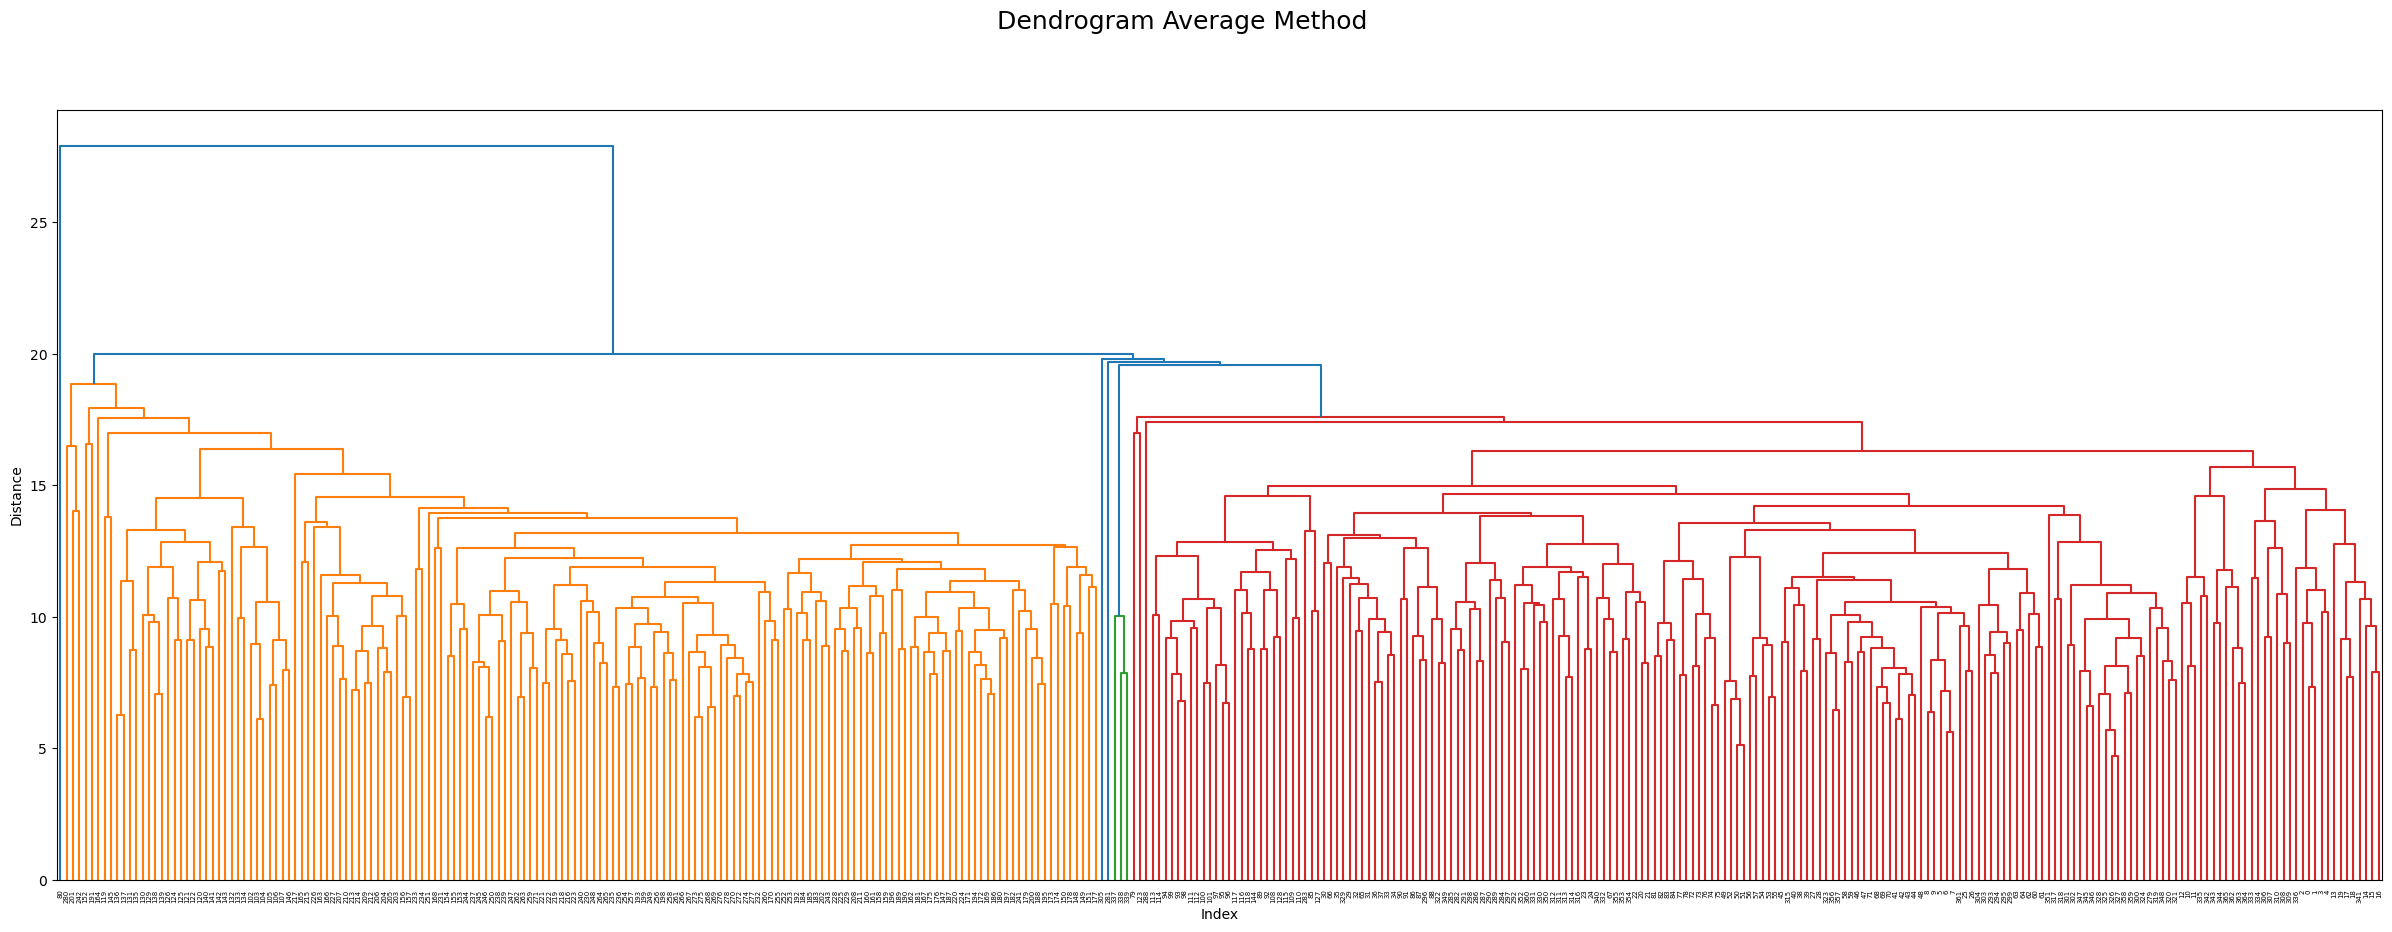

In [22]:
#Comparing all stations 1980 - average method

distance_single = linkage(df1980_scaled.loc[:,
['BASEL_cloud_cover','BASEL_wind_speed','BASEL_humidity','BASEL_pressure','BASEL_global_radiation','BASEL_precipitation','BASEL_snow_depth',
 'BASEL_sunshine','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max','BELGRADE_cloud_cover','BELGRADE_humidity','BELGRADE_pressure',
 'BELGRADE_global_radiation','BELGRADE_precipitation','BELGRADE_sunshine','BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_cloud_cover','BUDAPEST_humidity','BUDAPEST_pressure','BUDAPEST_global_radiation','BUDAPEST_precipitation',
 'BUDAPEST_sunshine','BUDAPEST_temp_mean','BUDAPEST_temp_min','BUDAPEST_temp_max','DEBILT_cloud_cover','DEBILT_wind_speed','DEBILT_humidity',
 'DEBILT_pressure','DEBILT_global_radiation','DEBILT_precipitation','DEBILT_sunshine','DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_cloud_cover','DUSSELDORF_wind_speed','DUSSELDORF_humidity','DUSSELDORF_pressure','DUSSELDORF_global_radiation','DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth','DUSSELDORF_sunshine','DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max','GDANSK_cloud_cover',
 'GDANSK_humidity','GDANSK_precipitation','GDANSK_snow_depth','GDANSK_temp_mean','GDANSK_temp_min','GDANSK_temp_max','HEATHROW_cloud_cover',
 'HEATHROW_humidity','HEATHROW_pressure','HEATHROW_global_radiation','HEATHROW_precipitation','HEATHROW_snow_depth','HEATHROW_sunshine',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max','KASSEL_wind_speed','KASSEL_humidity','KASSEL_pressure','KASSEL_global_radiation',
 'KASSEL_precipitation','KASSEL_sunshine','KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max','LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed','LJUBLJANA_humidity','LJUBLJANA_pressure','LJUBLJANA_global_radiation','LJUBLJANA_precipitation','LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max','MAASTRICHT_cloud_cover','MAASTRICHT_wind_speed','MAASTRICHT_humidity',
 'MAASTRICHT_pressure','MAASTRICHT_global_radiation','MAASTRICHT_precipitation','MAASTRICHT_sunshine','MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min','MAASTRICHT_temp_max','MADRID_cloud_cover','MADRID_wind_speed','MADRID_humidity','MADRID_pressure','MADRID_global_radiation',
 'MADRID_precipitation','MADRID_sunshine','MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max','MUNCHENB_cloud_cover','MUNCHENB_humidity',
 'MUNCHENB_global_radiation','MUNCHENB_precipitation','MUNCHENB_snow_depth','MUNCHENB_sunshine','MUNCHENB_temp_mean','MUNCHENB_temp_min',
 'MUNCHENB_temp_max','OSLO_cloud_cover','OSLO_wind_speed','OSLO_humidity','OSLO_pressure','OSLO_global_radiation','OSLO_precipitation',
 'OSLO_snow_depth','OSLO_sunshine','OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max','ROMA_cloud_cover','ROMA_wind_speed','ROMA_humidity',
 'ROMA_pressure','ROMA_sunshine','ROMA_temp_mean','SONNBLICK_cloud_cover','SONNBLICK_wind_speed','SONNBLICK_humidity','SONNBLICK_pressure',
 'SONNBLICK_global_radiation','SONNBLICK_precipitation','SONNBLICK_sunshine','SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover','STOCKHOLM_pressure','STOCKHOLM_global_radiation','STOCKHOLM_precipitation','STOCKHOLM_sunshine','STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min','STOCKHOLM_temp_max','TOURS_wind_speed','TOURS_humidity','TOURS_pressure','TOURS_global_radiation','TOURS_precipitation',
 'TOURS_temp_mean','TOURS_temp_min','TOURS_temp_max','VALENTIA_cloud_cover','VALENTIA_humidity','VALENTIA_pressure','VALENTIA_global_radiation',
 'VALENTIA_precipitation','VALENTIA_snow_depth','VALENTIA_sunshine','VALENTIA_temp_mean','VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="average")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

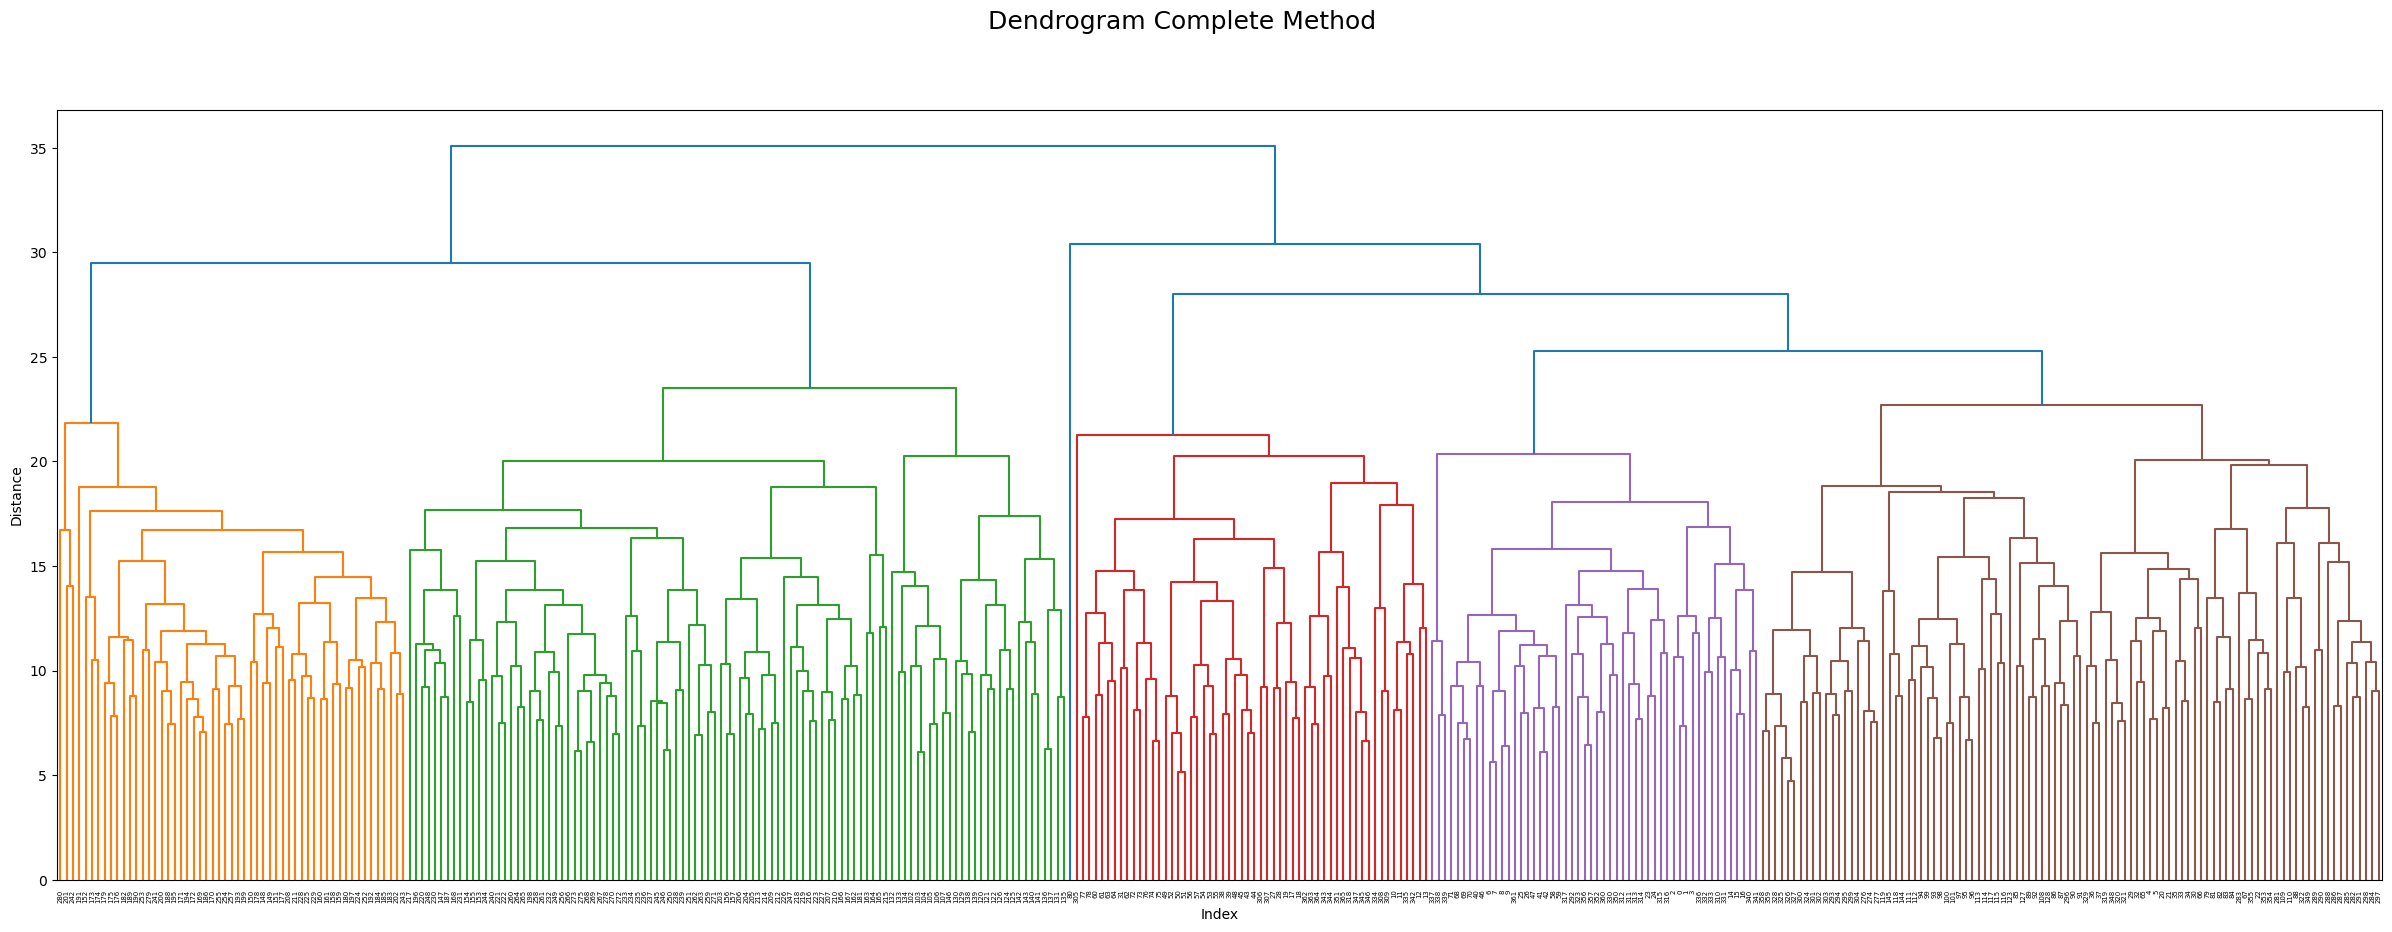

In [23]:
#Comparing all stations 1980 - complete method

distance_single = linkage(df1980_scaled.loc[:,
['BASEL_cloud_cover','BASEL_wind_speed','BASEL_humidity','BASEL_pressure','BASEL_global_radiation','BASEL_precipitation','BASEL_snow_depth',
 'BASEL_sunshine','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max','BELGRADE_cloud_cover','BELGRADE_humidity','BELGRADE_pressure',
 'BELGRADE_global_radiation','BELGRADE_precipitation','BELGRADE_sunshine','BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_cloud_cover','BUDAPEST_humidity','BUDAPEST_pressure','BUDAPEST_global_radiation','BUDAPEST_precipitation',
 'BUDAPEST_sunshine','BUDAPEST_temp_mean','BUDAPEST_temp_min','BUDAPEST_temp_max','DEBILT_cloud_cover','DEBILT_wind_speed','DEBILT_humidity',
 'DEBILT_pressure','DEBILT_global_radiation','DEBILT_precipitation','DEBILT_sunshine','DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_cloud_cover','DUSSELDORF_wind_speed','DUSSELDORF_humidity','DUSSELDORF_pressure','DUSSELDORF_global_radiation','DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth','DUSSELDORF_sunshine','DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max','GDANSK_cloud_cover',
 'GDANSK_humidity','GDANSK_precipitation','GDANSK_snow_depth','GDANSK_temp_mean','GDANSK_temp_min','GDANSK_temp_max','HEATHROW_cloud_cover',
 'HEATHROW_humidity','HEATHROW_pressure','HEATHROW_global_radiation','HEATHROW_precipitation','HEATHROW_snow_depth','HEATHROW_sunshine',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max','KASSEL_wind_speed','KASSEL_humidity','KASSEL_pressure','KASSEL_global_radiation',
 'KASSEL_precipitation','KASSEL_sunshine','KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max','LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed','LJUBLJANA_humidity','LJUBLJANA_pressure','LJUBLJANA_global_radiation','LJUBLJANA_precipitation','LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max','MAASTRICHT_cloud_cover','MAASTRICHT_wind_speed','MAASTRICHT_humidity',
 'MAASTRICHT_pressure','MAASTRICHT_global_radiation','MAASTRICHT_precipitation','MAASTRICHT_sunshine','MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min','MAASTRICHT_temp_max','MADRID_cloud_cover','MADRID_wind_speed','MADRID_humidity','MADRID_pressure','MADRID_global_radiation',
 'MADRID_precipitation','MADRID_sunshine','MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max','MUNCHENB_cloud_cover','MUNCHENB_humidity',
 'MUNCHENB_global_radiation','MUNCHENB_precipitation','MUNCHENB_snow_depth','MUNCHENB_sunshine','MUNCHENB_temp_mean','MUNCHENB_temp_min',
 'MUNCHENB_temp_max','OSLO_cloud_cover','OSLO_wind_speed','OSLO_humidity','OSLO_pressure','OSLO_global_radiation','OSLO_precipitation',
 'OSLO_snow_depth','OSLO_sunshine','OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max','ROMA_cloud_cover','ROMA_wind_speed','ROMA_humidity',
 'ROMA_pressure','ROMA_sunshine','ROMA_temp_mean','SONNBLICK_cloud_cover','SONNBLICK_wind_speed','SONNBLICK_humidity','SONNBLICK_pressure',
 'SONNBLICK_global_radiation','SONNBLICK_precipitation','SONNBLICK_sunshine','SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover','STOCKHOLM_pressure','STOCKHOLM_global_radiation','STOCKHOLM_precipitation','STOCKHOLM_sunshine','STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min','STOCKHOLM_temp_max','TOURS_wind_speed','TOURS_humidity','TOURS_pressure','TOURS_global_radiation','TOURS_precipitation',
 'TOURS_temp_mean','TOURS_temp_min','TOURS_temp_max','VALENTIA_cloud_cover','VALENTIA_humidity','VALENTIA_pressure','VALENTIA_global_radiation',
 'VALENTIA_precipitation','VALENTIA_snow_depth','VALENTIA_sunshine','VALENTIA_temp_mean','VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="complete")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

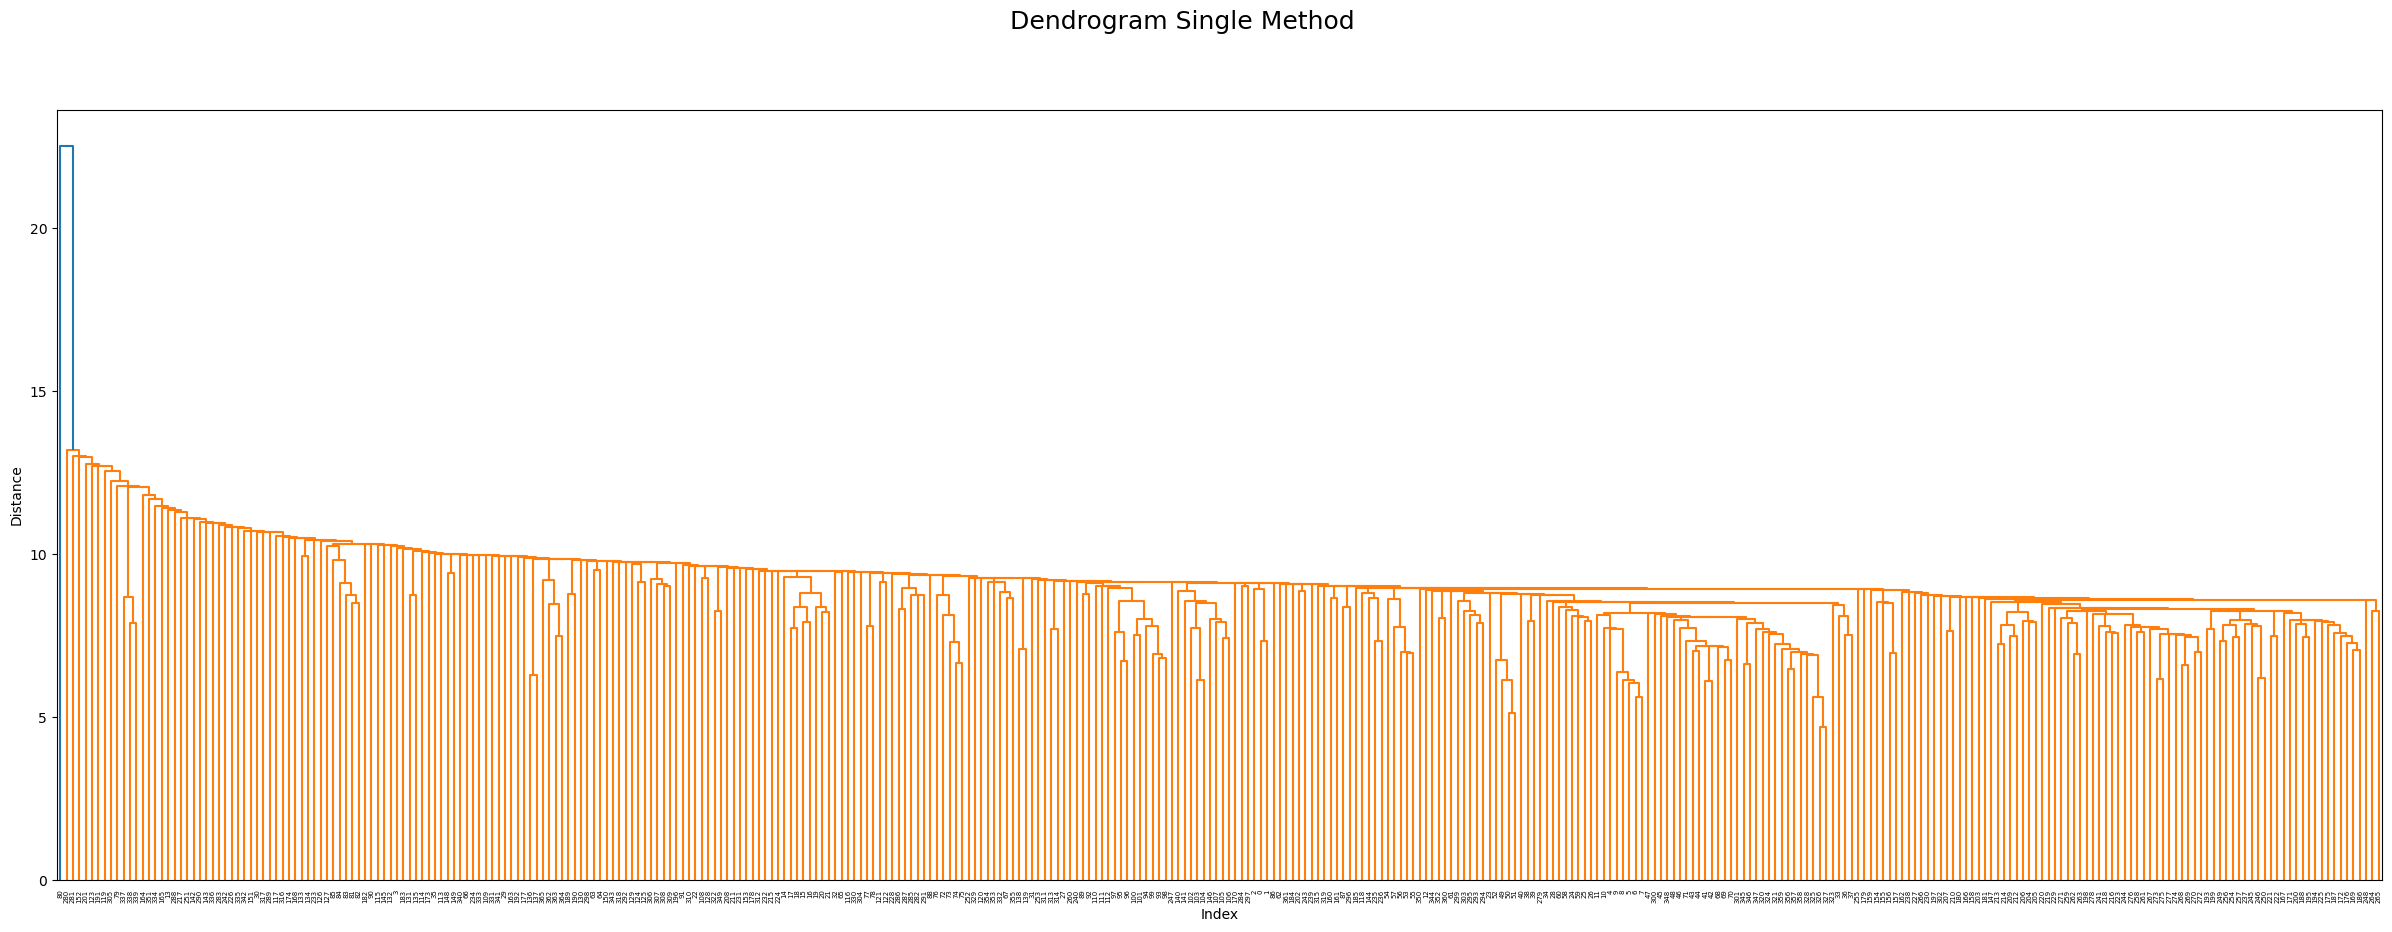

In [24]:
#Comparing all stations 1980 - single method

distance_single = linkage(df1980_scaled.loc[:,
['BASEL_cloud_cover','BASEL_wind_speed','BASEL_humidity','BASEL_pressure','BASEL_global_radiation','BASEL_precipitation','BASEL_snow_depth',
 'BASEL_sunshine','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max','BELGRADE_cloud_cover','BELGRADE_humidity','BELGRADE_pressure',
 'BELGRADE_global_radiation','BELGRADE_precipitation','BELGRADE_sunshine','BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_cloud_cover','BUDAPEST_humidity','BUDAPEST_pressure','BUDAPEST_global_radiation','BUDAPEST_precipitation',
 'BUDAPEST_sunshine','BUDAPEST_temp_mean','BUDAPEST_temp_min','BUDAPEST_temp_max','DEBILT_cloud_cover','DEBILT_wind_speed','DEBILT_humidity',
 'DEBILT_pressure','DEBILT_global_radiation','DEBILT_precipitation','DEBILT_sunshine','DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_cloud_cover','DUSSELDORF_wind_speed','DUSSELDORF_humidity','DUSSELDORF_pressure','DUSSELDORF_global_radiation','DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth','DUSSELDORF_sunshine','DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max','GDANSK_cloud_cover',
 'GDANSK_humidity','GDANSK_precipitation','GDANSK_snow_depth','GDANSK_temp_mean','GDANSK_temp_min','GDANSK_temp_max','HEATHROW_cloud_cover',
 'HEATHROW_humidity','HEATHROW_pressure','HEATHROW_global_radiation','HEATHROW_precipitation','HEATHROW_snow_depth','HEATHROW_sunshine',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max','KASSEL_wind_speed','KASSEL_humidity','KASSEL_pressure','KASSEL_global_radiation',
 'KASSEL_precipitation','KASSEL_sunshine','KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max','LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed','LJUBLJANA_humidity','LJUBLJANA_pressure','LJUBLJANA_global_radiation','LJUBLJANA_precipitation','LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max','MAASTRICHT_cloud_cover','MAASTRICHT_wind_speed','MAASTRICHT_humidity',
 'MAASTRICHT_pressure','MAASTRICHT_global_radiation','MAASTRICHT_precipitation','MAASTRICHT_sunshine','MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min','MAASTRICHT_temp_max','MADRID_cloud_cover','MADRID_wind_speed','MADRID_humidity','MADRID_pressure','MADRID_global_radiation',
 'MADRID_precipitation','MADRID_sunshine','MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max','MUNCHENB_cloud_cover','MUNCHENB_humidity',
 'MUNCHENB_global_radiation','MUNCHENB_precipitation','MUNCHENB_snow_depth','MUNCHENB_sunshine','MUNCHENB_temp_mean','MUNCHENB_temp_min',
 'MUNCHENB_temp_max','OSLO_cloud_cover','OSLO_wind_speed','OSLO_humidity','OSLO_pressure','OSLO_global_radiation','OSLO_precipitation',
 'OSLO_snow_depth','OSLO_sunshine','OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max','ROMA_cloud_cover','ROMA_wind_speed','ROMA_humidity',
 'ROMA_pressure','ROMA_sunshine','ROMA_temp_mean','SONNBLICK_cloud_cover','SONNBLICK_wind_speed','SONNBLICK_humidity','SONNBLICK_pressure',
 'SONNBLICK_global_radiation','SONNBLICK_precipitation','SONNBLICK_sunshine','SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover','STOCKHOLM_pressure','STOCKHOLM_global_radiation','STOCKHOLM_precipitation','STOCKHOLM_sunshine','STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min','STOCKHOLM_temp_max','TOURS_wind_speed','TOURS_humidity','TOURS_pressure','TOURS_global_radiation','TOURS_precipitation',
 'TOURS_temp_mean','TOURS_temp_min','TOURS_temp_max','VALENTIA_cloud_cover','VALENTIA_humidity','VALENTIA_pressure','VALENTIA_global_radiation',
 'VALENTIA_precipitation','VALENTIA_snow_depth','VALENTIA_sunshine','VALENTIA_temp_mean','VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="single")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

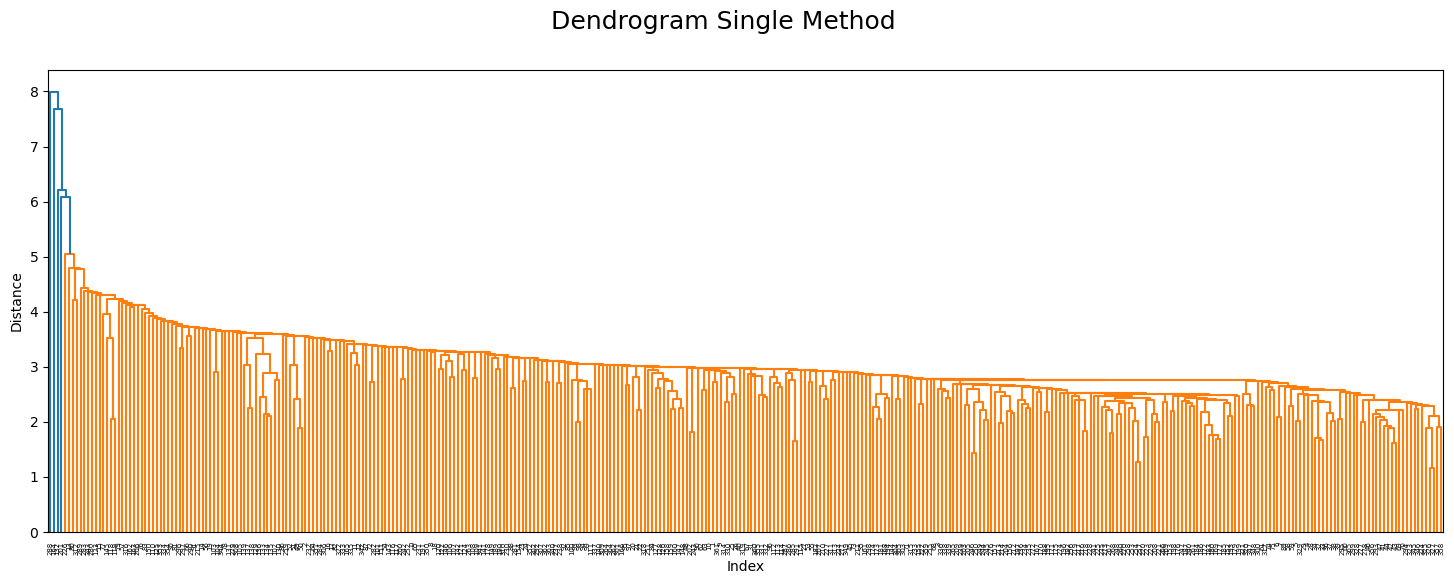

In [25]:
#Comparing Madrid v Heathrow v Maastricht 1980 - single method

distance_single = linkage(df1980_scaled.loc[:,
['HEATHROW_cloud_cover','HEATHROW_humidity','HEATHROW_pressure','HEATHROW_global_radiation',
 'HEATHROW_precipitation','HEATHROW_snow_depth','HEATHROW_sunshine','HEATHROW_temp_mean',
 'HEATHROW_temp_min','HEATHROW_temp_max','MAASTRICHT_cloud_cover','MAASTRICHT_wind_speed','MAASTRICHT_humidity',
 'MAASTRICHT_pressure','MAASTRICHT_global_radiation','MAASTRICHT_precipitation','MAASTRICHT_sunshine','MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min','MAASTRICHT_temp_max','MADRID_cloud_cover','MADRID_wind_speed','MADRID_humidity','MADRID_pressure',
 'MADRID_global_radiation','MADRID_precipitation','MADRID_sunshine','MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max']],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

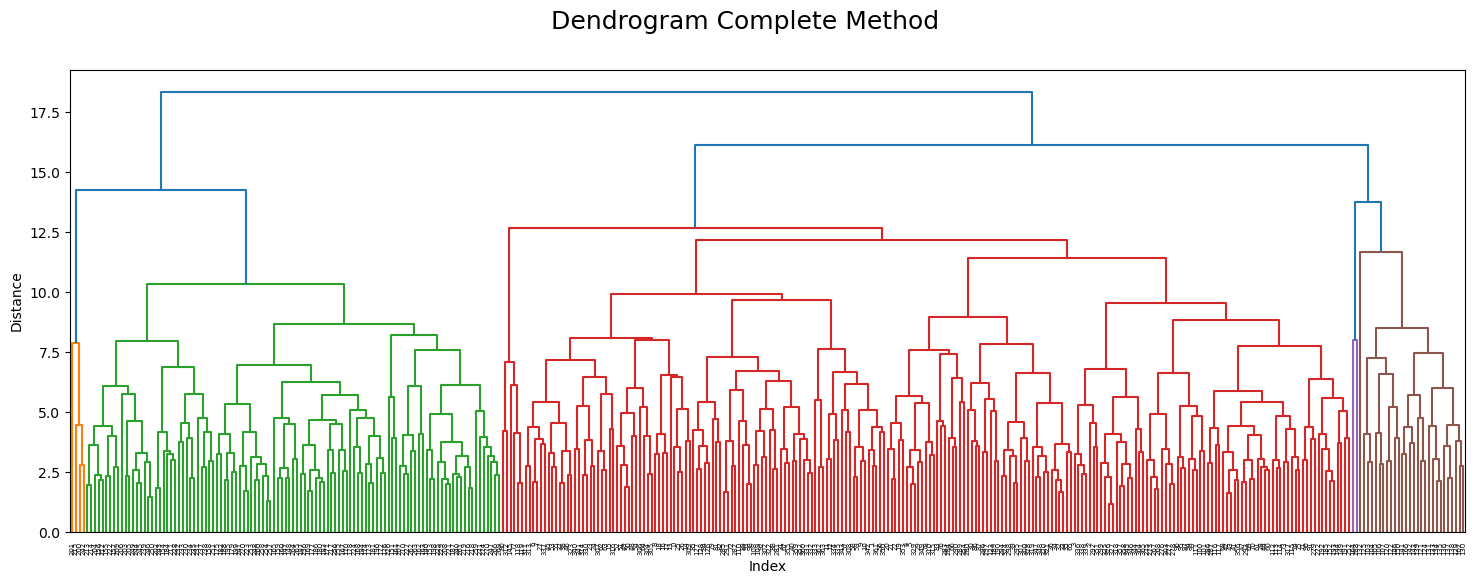

In [26]:
#Comparing Madrid v Heathrow v Maastricht 1980 - complete method

distance_single = linkage(df1980_scaled.loc[:,
['HEATHROW_cloud_cover','HEATHROW_humidity','HEATHROW_pressure','HEATHROW_global_radiation',
 'HEATHROW_precipitation','HEATHROW_snow_depth','HEATHROW_sunshine','HEATHROW_temp_mean',
 'HEATHROW_temp_min','HEATHROW_temp_max','MAASTRICHT_cloud_cover','MAASTRICHT_wind_speed','MAASTRICHT_humidity',
 'MAASTRICHT_pressure','MAASTRICHT_global_radiation','MAASTRICHT_precipitation','MAASTRICHT_sunshine','MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min','MAASTRICHT_temp_max','MADRID_cloud_cover','MADRID_wind_speed','MADRID_humidity','MADRID_pressure',
 'MADRID_global_radiation','MADRID_precipitation','MADRID_sunshine','MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max']],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

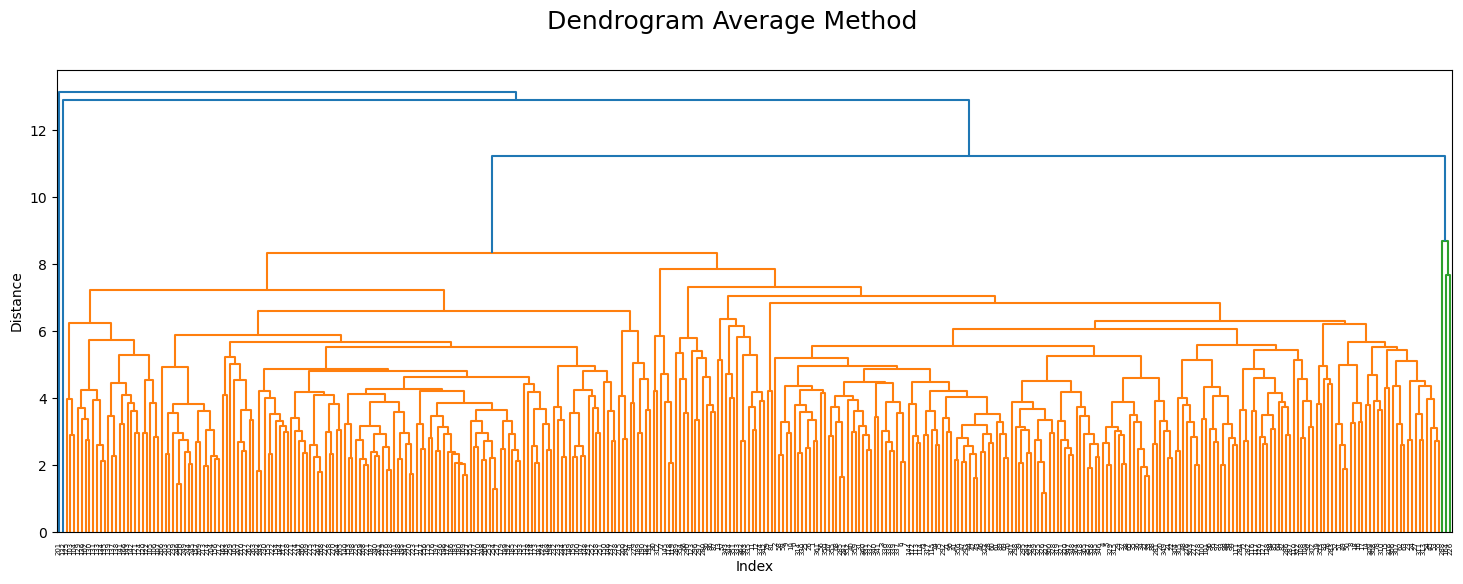

In [27]:
#Comparing Madrid v Heathrow v Maastricht 1980 - average method

distance_single = linkage(df1980_scaled.loc[:,
['HEATHROW_cloud_cover','HEATHROW_humidity','HEATHROW_pressure','HEATHROW_global_radiation',
 'HEATHROW_precipitation','HEATHROW_snow_depth','HEATHROW_sunshine','HEATHROW_temp_mean',
 'HEATHROW_temp_min','HEATHROW_temp_max','MAASTRICHT_cloud_cover','MAASTRICHT_wind_speed','MAASTRICHT_humidity',
 'MAASTRICHT_pressure','MAASTRICHT_global_radiation','MAASTRICHT_precipitation','MAASTRICHT_sunshine','MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min','MAASTRICHT_temp_max','MADRID_cloud_cover','MADRID_wind_speed','MADRID_humidity','MADRID_pressure',
 'MADRID_global_radiation','MADRID_precipitation','MADRID_sunshine','MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max']],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

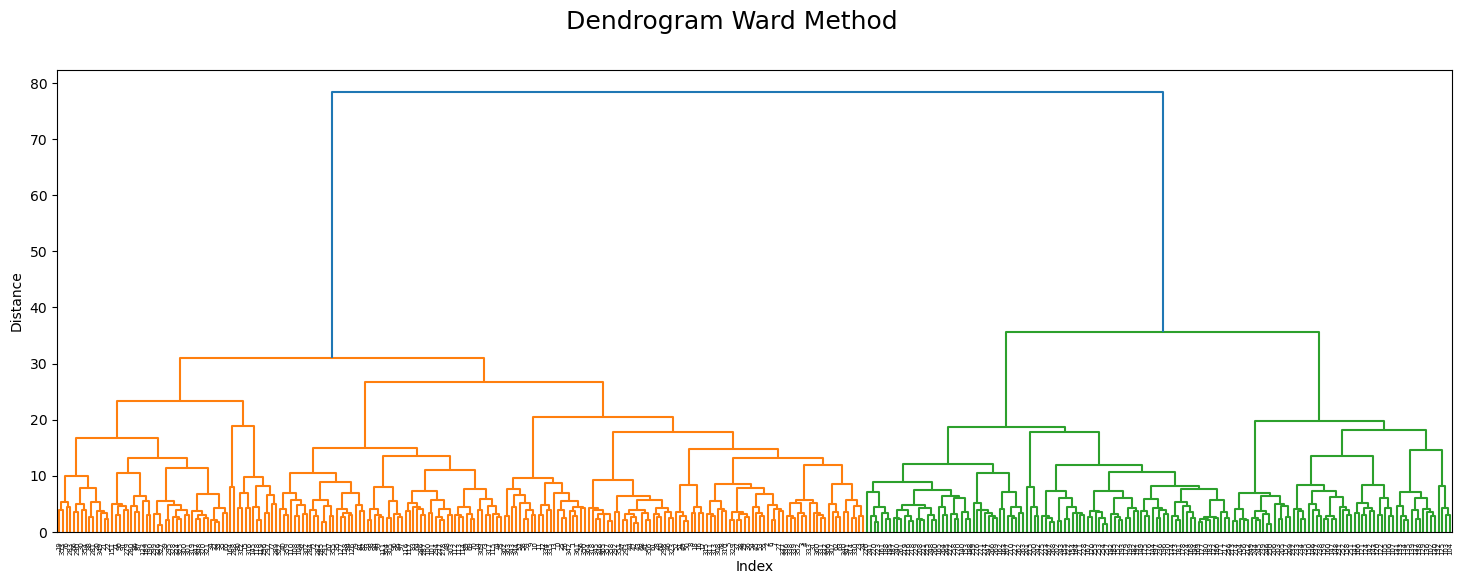

In [28]:
#Comparing Madrid v Heathrow v Maastricht - ward method

distance_single = linkage(df1980_scaled.loc[:,
['HEATHROW_cloud_cover','HEATHROW_humidity','HEATHROW_pressure','HEATHROW_global_radiation',
 'HEATHROW_precipitation','HEATHROW_snow_depth','HEATHROW_sunshine','HEATHROW_temp_mean',
 'HEATHROW_temp_min','HEATHROW_temp_max','MAASTRICHT_cloud_cover','MAASTRICHT_wind_speed','MAASTRICHT_humidity',
 'MAASTRICHT_pressure','MAASTRICHT_global_radiation','MAASTRICHT_precipitation','MAASTRICHT_sunshine','MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min','MAASTRICHT_temp_max','MADRID_cloud_cover','MADRID_wind_speed','MADRID_humidity','MADRID_pressure',
 'MADRID_global_radiation','MADRID_precipitation','MADRID_sunshine','MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max']],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

### 4. Principal Components Analysis

In [29]:
cols = ['BASEL_cloud_cover','BASEL_wind_speed','BASEL_humidity','BASEL_pressure','BASEL_global_radiation','BASEL_precipitation','BASEL_snow_depth',
 'BASEL_sunshine','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max','BELGRADE_cloud_cover','BELGRADE_humidity','BELGRADE_pressure',
 'BELGRADE_global_radiation','BELGRADE_precipitation','BELGRADE_sunshine','BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_cloud_cover','BUDAPEST_humidity','BUDAPEST_pressure','BUDAPEST_global_radiation','BUDAPEST_precipitation',
 'BUDAPEST_sunshine','BUDAPEST_temp_mean','BUDAPEST_temp_min','BUDAPEST_temp_max','DEBILT_cloud_cover','DEBILT_wind_speed','DEBILT_humidity',
 'DEBILT_pressure','DEBILT_global_radiation','DEBILT_precipitation','DEBILT_sunshine','DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_cloud_cover','DUSSELDORF_wind_speed','DUSSELDORF_humidity','DUSSELDORF_pressure','DUSSELDORF_global_radiation','DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth','DUSSELDORF_sunshine','DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max','GDANSK_cloud_cover',
 'GDANSK_humidity','GDANSK_precipitation','GDANSK_snow_depth','GDANSK_temp_mean','GDANSK_temp_min','GDANSK_temp_max','HEATHROW_cloud_cover',
 'HEATHROW_humidity','HEATHROW_pressure','HEATHROW_global_radiation','HEATHROW_precipitation','HEATHROW_snow_depth','HEATHROW_sunshine',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max','KASSEL_wind_speed','KASSEL_humidity','KASSEL_pressure','KASSEL_global_radiation',
 'KASSEL_precipitation','KASSEL_sunshine','KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max','LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed','LJUBLJANA_humidity','LJUBLJANA_pressure','LJUBLJANA_global_radiation','LJUBLJANA_precipitation','LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max','MAASTRICHT_cloud_cover','MAASTRICHT_wind_speed','MAASTRICHT_humidity',
 'MAASTRICHT_pressure','MAASTRICHT_global_radiation','MAASTRICHT_precipitation','MAASTRICHT_sunshine','MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min','MAASTRICHT_temp_max','MADRID_cloud_cover','MADRID_wind_speed','MADRID_humidity','MADRID_pressure','MADRID_global_radiation',
 'MADRID_precipitation','MADRID_sunshine','MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max','MUNCHENB_cloud_cover','MUNCHENB_humidity',
 'MUNCHENB_global_radiation','MUNCHENB_precipitation','MUNCHENB_snow_depth','MUNCHENB_sunshine','MUNCHENB_temp_mean','MUNCHENB_temp_min',
 'MUNCHENB_temp_max','OSLO_cloud_cover','OSLO_wind_speed','OSLO_humidity','OSLO_pressure','OSLO_global_radiation','OSLO_precipitation',
 'OSLO_snow_depth','OSLO_sunshine','OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max','ROMA_cloud_cover','ROMA_wind_speed','ROMA_humidity',
 'ROMA_pressure','ROMA_sunshine','ROMA_temp_mean','SONNBLICK_cloud_cover','SONNBLICK_wind_speed','SONNBLICK_humidity','SONNBLICK_pressure',
 'SONNBLICK_global_radiation','SONNBLICK_precipitation','SONNBLICK_sunshine','SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover','STOCKHOLM_pressure','STOCKHOLM_global_radiation','STOCKHOLM_precipitation','STOCKHOLM_sunshine','STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min','STOCKHOLM_temp_max','TOURS_wind_speed','TOURS_humidity','TOURS_pressure','TOURS_global_radiation','TOURS_precipitation',
 'TOURS_temp_mean','TOURS_temp_min','TOURS_temp_max','VALENTIA_cloud_cover','VALENTIA_humidity','VALENTIA_pressure','VALENTIA_global_radiation',
 'VALENTIA_precipitation','VALENTIA_snow_depth','VALENTIA_sunshine','VALENTIA_temp_mean','VALENTIA_temp_min',
 'VALENTIA_temp_max'
]
df3 = df1980_scaled[cols]
df3

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.146463,-4.440892e-16,0.592181,-2.220446e-16,-0.984680,-0.479666,5.192341,-0.569428,-1.432408,-1.633316,...,-0.070446,0.695009,-0.152794,-1.122781,-0.479657,-0.052342,-0.905042,-1.709969,-1.378123,-2.087878
1,-0.269084,-4.440892e-16,0.698843,-2.220446e-16,-1.054921,-0.270045,4.517005,-0.746670,-1.564752,-1.567779,...,0.543444,0.564494,0.452630,-1.182280,1.097345,-0.052342,-0.905042,-1.135480,-1.652630,-0.460614
2,0.977558,-4.440892e-16,0.272193,-2.220446e-16,-0.937853,-0.322450,5.867678,-0.468147,-1.402998,-1.518626,...,1.157334,1.347583,-0.823416,-1.170381,0.126882,-0.052342,-0.905042,-0.331195,-0.354963,-0.253507
3,0.977558,-4.440892e-16,1.765468,-2.220446e-16,-1.242229,0.620845,5.867678,-0.974552,-1.447113,-1.272864,...,-0.684336,-0.610139,-1.046957,-0.968083,0.016602,-0.052342,-0.441156,-0.762062,-0.454783,-1.141106
4,0.977558,-4.440892e-16,1.338818,-2.220446e-16,-1.160282,0.175400,5.192341,-0.923912,-0.873619,-0.830490,...,0.543444,-0.740653,-0.115537,-1.063282,-0.501713,-0.052342,-0.874116,-0.790786,-0.379918,-1.052346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-0.269084,-4.440892e-16,-0.581106,-2.220446e-16,-0.797372,-0.505869,-0.210351,0.088898,-1.211833,-1.125406,...,0.543444,1.217068,1.812503,-1.134681,-0.325265,-0.052342,-0.905042,-1.049306,-1.078662,-0.904413
362,0.562011,-4.440892e-16,1.338818,-2.220446e-16,-0.867613,-0.505869,-0.210351,-0.189625,-1.520637,-1.305632,...,1.157334,1.608612,1.970845,-1.110881,-0.479657,-0.052342,-0.905042,-0.905684,-0.903976,-0.756480
363,-1.931273,-4.440892e-16,0.378856,-2.220446e-16,-0.645184,-0.505869,-0.210351,0.747223,-1.711802,-1.846310,...,1.157334,1.347583,1.607591,-1.134681,-0.402461,-0.052342,-0.905042,-0.158848,0.293871,-0.697307
364,0.562011,-4.440892e-16,0.378856,-2.220446e-16,-0.914440,-0.505869,-0.210351,-0.366867,-1.682392,-1.715237,...,1.157334,0.825524,1.207080,-1.122781,-0.391433,-0.052342,-0.874116,-0.043950,0.318826,-0.460614


In [30]:
#Run the PCA model, reducing to 9 (for number of measurements)
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(df3)

In [31]:
principalComponents

array([[-10.7719679 ,  -2.06567432,  -1.68210093, ...,  -0.72140848,
         -4.74355335,   2.22494141],
       [-11.28267334,   0.80656058,  -1.54902794, ...,   0.11854235,
         -4.11723538,   2.76096035],
       [-12.43214872,   1.59551105,   0.87635234, ...,  -2.220629  ,
         -2.69743173,   3.78562124],
       ...,
       [ -9.55947546,   3.54838127,   7.41215984, ...,   2.5223037 ,
         -0.64196912,  -1.9135692 ],
       [ -8.23605637,   2.21705098,   7.5916219 , ...,   1.27331187,
          0.8088563 ,  -1.28407259],
       [ -7.35449009,   1.30649693,   6.86855042, ...,   0.18226024,
         -1.33112851,  -2.51681917]])

In [32]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9'])

In [33]:
dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-10.771968,-2.065674,-1.682101,0.328145,0.410401,-1.629085,-0.721408,-4.743553,2.224941
1,-11.282673,0.806561,-1.549028,2.991576,0.299773,-1.390130,0.118542,-4.117235,2.760960
2,-12.432149,1.595511,0.876352,2.018828,0.885977,-4.256021,-2.220629,-2.697432,3.785621
3,-12.356330,-1.201357,2.169010,-2.685124,4.145572,-3.148782,-1.484666,-2.757576,4.692574
4,-10.491213,-3.157456,0.819761,-1.178048,0.571174,-1.037662,0.564085,-1.294635,2.951484
...,...,...,...,...,...,...,...,...,...
361,-10.387279,0.436434,-1.226330,4.519875,-1.623406,0.411817,-0.135855,-0.723932,1.227282
362,-10.758344,3.581410,3.719320,5.486611,1.988247,-0.394721,1.150442,-0.038018,0.180117
363,-9.559475,3.548381,7.412160,3.861970,3.511865,0.603847,2.522304,-0.641969,-1.913569
364,-8.236056,2.217051,7.591622,3.844705,3.432180,0.392990,1.273312,0.808856,-1.284073


### Exporting PCA'd dataset to csv file

In [34]:
dfPCA.to_csv(os.path.join(path,'1980_PCA.csv'))